In [1]:
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila' #/bank = Name of Database
engine = create_engine(connection_string)

In [3]:
query = '''select distinct film_id, title, rental_rate, rating, release_year, category_id, name  from film f
join film_category fc
using (film_id)
join category
using (category_id);'''
query2  = '''SELECT DISTINCT f.title, MAX(IF(r.rental_date BETWEEN '2005-05-01' AND '2005-05-31', 1, 0)) as rented_in_may 
FROM film f
LEFT JOIN inventory i USING (film_id)
LEFT JOIN rental r USING (inventory_id)
GROUP BY F.title
ORDER BY f.title;'''
data = pd.read_sql_query(query, engine) #read in whole Table or query
data2 = pd.read_sql_query(query2, engine)
display(data)
display(data2)

,film_id,title,rental_rate,rating,release_year,category_id,name
0,19,AMADEUS HOLY,0.99,PG,2006,1,Action
1,21,AMERICAN CIRCUS,4.99,R,2006,1,Action
2,29,ANTITRUST TOMATOES,2.99,NC-17,2006,1,Action
3,38,ARK RIDGEMONT,0.99,NC-17,2006,1,Action
4,56,BAREFOOT MANCHURIAN,2.99,G,2006,1,Action
...,...,...,...,...,...,...,...
995,931,VALENTINE VANISHING,0.99,PG-13,2006,16,Travel
996,977,WINDOW SIDE,2.99,R,2006,16,Travel
997,981,WOLVES DESIRE,0.99,NC-17,2006,16,Travel
998,988,WORKER TARZAN,2.99,R,2006,16,Travel


,title,rented_in_may
0,ACADEMY DINOSAUR,1
1,ACE GOLDFINGER,0
2,ADAPTATION HOLES,0
3,AFFAIR PREJUDICE,1
4,AFRICAN EGG,1
...,...,...
995,YOUNG LANGUAGE,0
996,YOUTH KICK,0
997,ZHIVAGO CORE,1
998,ZOOLANDER FICTION,1


In [4]:
alldata = pd.concat([data, data2], axis = 1)
alldata

,film_id,title,rental_rate,rating,release_year,category_id,name,title,rented_in_may
0,19,AMADEUS HOLY,0.99,PG,2006,1,Action,ACADEMY DINOSAUR,1
1,21,AMERICAN CIRCUS,4.99,R,2006,1,Action,ACE GOLDFINGER,0
2,29,ANTITRUST TOMATOES,2.99,NC-17,2006,1,Action,ADAPTATION HOLES,0
3,38,ARK RIDGEMONT,0.99,NC-17,2006,1,Action,AFFAIR PREJUDICE,1
4,56,BAREFOOT MANCHURIAN,2.99,G,2006,1,Action,AFRICAN EGG,1
...,...,...,...,...,...,...,...,...,...
995,931,VALENTINE VANISHING,0.99,PG-13,2006,16,Travel,YOUNG LANGUAGE,0
996,977,WINDOW SIDE,2.99,R,2006,16,Travel,YOUTH KICK,0
997,981,WOLVES DESIRE,0.99,NC-17,2006,16,Travel,ZHIVAGO CORE,1
998,988,WORKER TARZAN,2.99,R,2006,16,Travel,ZOOLANDER FICTION,1


In [5]:
# def to_integer(dt_time):
#     return 10000*dt_time.year + 100*dt_time.month + dt_time.day

# data['rental_date'] = data['rental_date'].apply(to_integer)

In [6]:
# data['rental_date'] = data['rental_date'].astype(str)

In [7]:
#alldata.head(50)

In [8]:
alldata.dtypes

film_id            int64
title             object
rental_rate      float64
rating            object
release_year       int64
category_id        int64
name              object
title             object
rented_in_may      int64
dtype: object

In [9]:
alldata.isna().sum()

film_id          0
title            0
rental_rate      0
rating           0
release_year     0
category_id      0
name             0
title            0
rented_in_may    0
dtype: int64

In [10]:
alldata['rating'].value_counts()

PG-13    223
NC-17    210
R        195
PG       194
G        178
Name: rating, dtype: int64

In [11]:
alldata['name'].value_counts()

Sports         74
Foreign        73
Family         69
Documentary    68
Animation      66
Action         64
New            63
Drama          62
Games          61
Sci-Fi         61
Children       60
Comedy         58
Classics       57
Travel         57
Horror         56
Music          51
Name: name, dtype: int64

In [12]:
#alldata = alldata.drop(['title'], axis = 1)

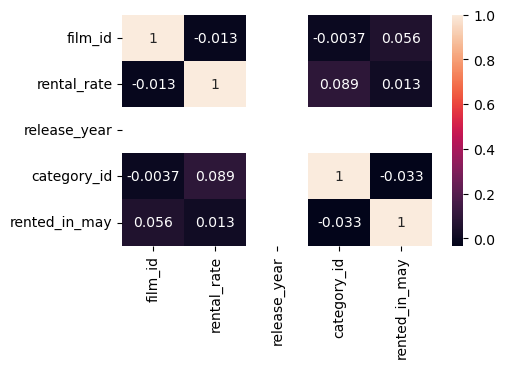

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=alldata.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
y = alldata['rented_in_may']
X = alldata.drop(['rented_in_may', 'film_id', 'title'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,rental_rate,release_year,category_id
0,0.5,0.0,1.000000
1,0.5,0.0,0.533333
2,0.5,0.0,0.400000
3,0.0,0.0,0.000000
4,1.0,0.0,0.266667
...,...,...,...
795,0.0,0.0,0.666667
796,1.0,0.0,0.666667
797,0.0,0.0,0.000000
798,0.5,0.0,0.266667


In [16]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

display(X_train_cat_encode.head())
X_train_cat_encode.shape

,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Animation,name_Children,name_Classics,name_Comedy,name_Documentary,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(800, 19)

In [17]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encode], axis=1)

In [18]:
X_train_transformed

,rental_rate,release_year,category_id,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Animation,name_Children,name_Classics,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,0.5,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.5,0.0,0.533333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.266667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
796,1.0,0.0,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.5,0.0,0.266667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# pd.DataFrame(X_train_transformed)

In [20]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='auto').fit(X_train_transformed, y_train)

In [21]:
# classification = LogisticRegression(random_state=0, solver='saga',
#                   multi_class='multinomial').fit(X_train_transformed, y_train)

In [22]:
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [23]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat) 

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

display(X_test_cat_encode.head())
X_test_cat_encode.shape

,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Animation,name_Children,name_Classics,name_Comedy,name_Documentary,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(200, 19)

In [24]:
X_test_transformed = pd.concat([X_test_norm, X_test_cat_encode], axis=1)

In [25]:
X_test_transformed

,0,1,2,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Animation,name_Children,name_Classics,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
0,0.5,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.200000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.0,0.533333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.5,0.0,0.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.5,0.0,0.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

C:\Users\Customer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Customer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Customer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Customer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.65

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,  67],
       [  3, 130]], dtype=int64)

In [28]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

C:\Users\Customer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Customer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Customer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Custome

0.565

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)